<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

This is the **official YOLOv5 🚀 notebook** by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

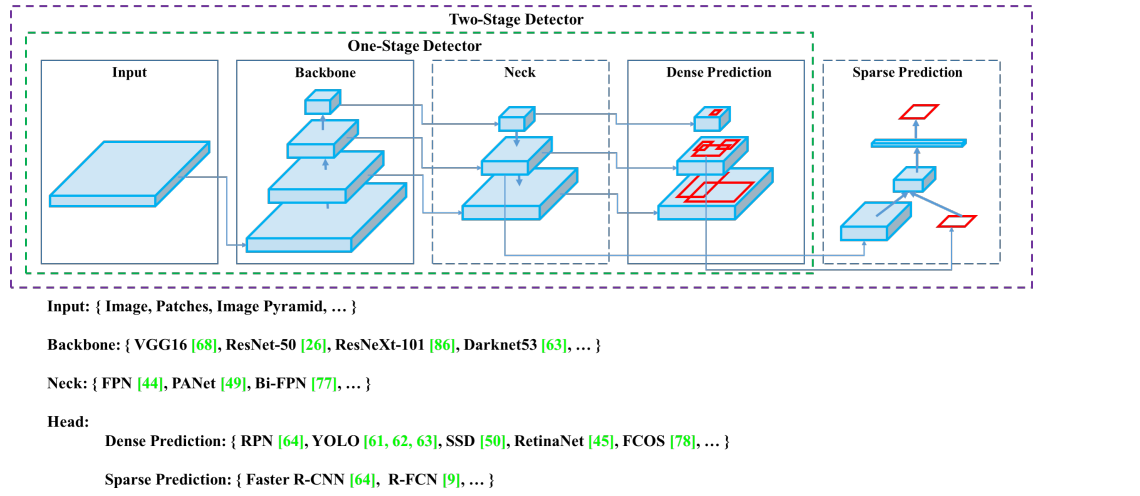

Модель YOLOv3 в качестве выхода использует три слоя для разбиения изображения на различную сетку, размеры ячеек этих сеток имеют такие значения: 8, 16 и 32. Допустим на входе у нас есть изображение размером 416x416 пикселей, тогда выходные матрицы (сетки) будут иметь размер 52x52, 26x26 и 13x13 (416/8 = 52, 416/16 = 26 и 416/32 = 13).

 Как уже говорилось ранее, выходные слои это матрицы размерностью 52x52, 26x26 и 13x13. Но дело в том, что каждый элемент данной матрицы это не число, это вектор. То есть выходной слой это трех-мерная матрица. Этот вектор имеет размерность B x (5 + C), где B — количество bounding box в ячейке, C — количество классов. Откуда число 5? Причина такая: для каждого box-a предсказывается вероятность что там есть объект (object confidence) — это одно число, а оставшиеся четыре — это x, y, width и height для предсказанного box-a. На рисунке ниже показано схематичное представление этого вектора:

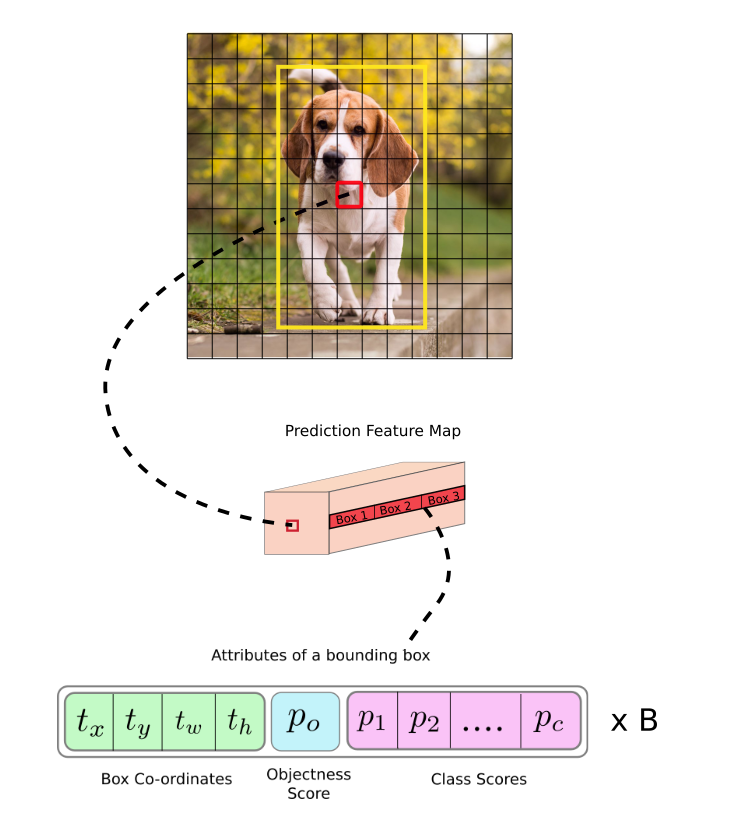

# Setup

Выбираем среду выполнения с ГПУ, скачиваем репозиторий с YOLOv5.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils

display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/78.2 GB disk)


# 1. Inference

`detect.py` запускает инференс YOLOv5 на различных данных.  Веса стандарных моделей, предобученных на COCO, скачиваются из последнего релиза репозитория  [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). По уолчанию результаты детекции сохраняются в  `runs/detect`. Пример источников данных для инференса:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [2]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.05 --source data/images


detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.05, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

100% 14.0M/14.0M [00:00<00:00, 93.0MB/s]

Fusing layers... 
YOLOv5s_v6 summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 fire hydrant, 1 stop sign, 1 handbag, 1 cup, 2 potted plants, Done. (0.051s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 5 persons, 3 ties, Done. (0.070s)
Speed: 0.7ms pre-process, 60.3ms inference, 59.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp

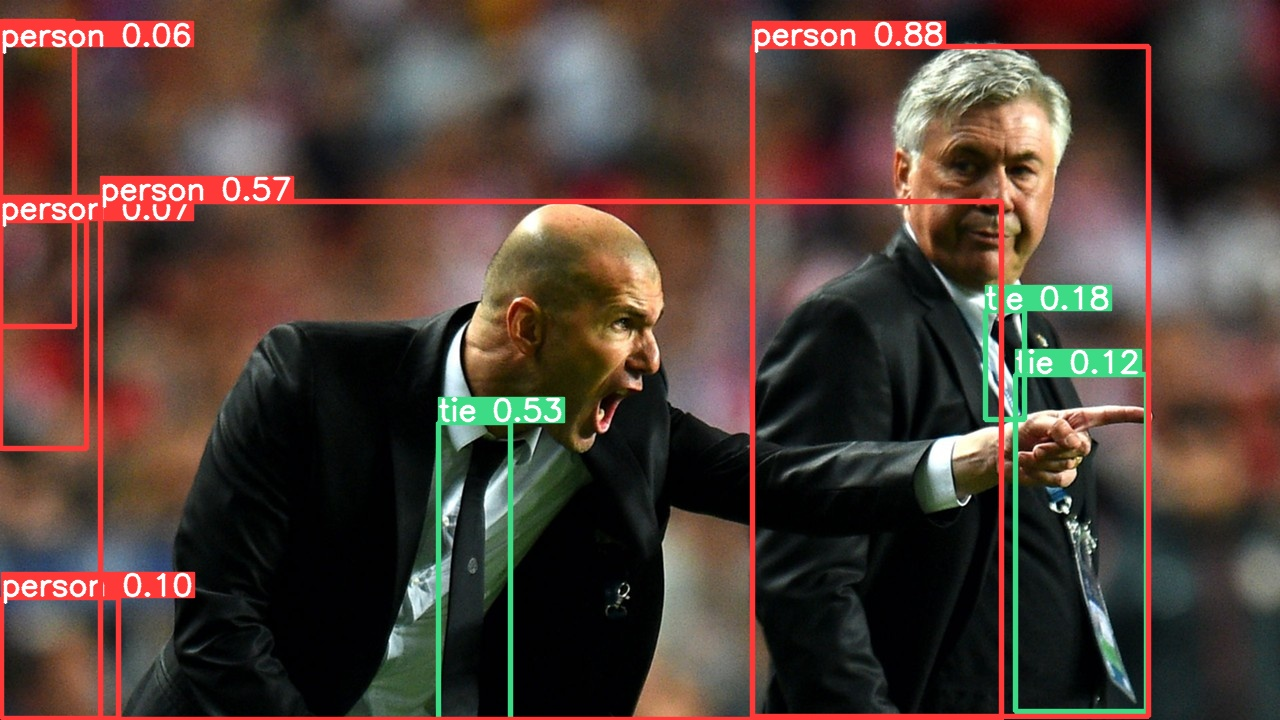

In [3]:
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

# 2 Обучение

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.
Для примера запустим обучение YOLOv5s на игрушечном наборе данных [COCO128](https://www.kaggle.com/ultralytics/coco128). В параметре `--data coco128.yaml` указан файл с путями для датасета и информацией о количестве классов объектов. В параметре `--weights yolov5s.pt` указываются веса, с которых необходимо производить дообучение или это поле отсается пустым, если необходимо учить сеть с 0.  В параметре --cfg yolov5s.yaml` передается файл с описание конфигурации модели. 

-  Если хотите использовать предобученные модели, то они будут загружены автоматически с  [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- Следующие датасеты доступны для автоматического скачивания: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- Результаты тренировки сохраняются в   `runs/train/`.
<br><br>



    parser.add_argument('--weights', type=str, default=ROOT / 'yolov5s.pt', help='initial weights path')
    parser.add_argument('--cfg', type=str, default='', help='model.yaml path')
    parser.add_argument('--data', type=str, default=ROOT / 'data/coco128.yaml', help='dataset.yaml path')
    parser.add_argument('--hyp', type=str, default=ROOT / 'data/hyps/hyp.scratch-low.yaml', help='hyperparameters path')
    parser.add_argument('--epochs', type=int, default=300)
    parser.add_argument('--batch-size', type=int, default=16, help='total batch size for all GPUs, -1 for autobatch')
    parser.add_argument('--imgsz', '--img', '--img-size', type=int, default=640, help='train, val image size (pixels)')
    parser.add_argument('--rect', action='store_true', help='rectangular training')
    parser.add_argument('--resume', nargs='?', const=True, default=False, help='resume most recent training')
    parser.add_argument('--nosave', action='store_true', help='only save final checkpoint')
    parser.add_argument('--noval', action='store_true', help='only validate final epoch')
    parser.add_argument('--noautoanchor', action='store_true', help='disable AutoAnchor')
    parser.add_argument('--evolve', type=int, nargs='?', const=300, help='evolve hyperparameters for x generations')
    parser.add_argument('--bucket', type=str, default='', help='gsutil bucket')
    parser.add_argument('--cache', type=str, nargs='?', const='ram', help='--cache images in "ram" (default) or "disk"')
    parser.add_argument('--image-weights', action='store_true', help='use weighted image selection for training')
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    parser.add_argument('--multi-scale', action='store_true', help='vary img-size +/- 50%%')
    parser.add_argument('--single-cls', action='store_true', help='train multi-class data as single-class')
    parser.add_argument('--optimizer', type=str, choices=['SGD', 'Adam', 'AdamW'], default='SGD', help='optimizer')
    parser.add_argument('--sync-bn', action='store_true', help='use SyncBatchNorm, only available in DDP mode')
    parser.add_argument('--workers', type=int, default=8, help='max dataloader workers (per RANK in DDP mode)')
    parser.add_argument('--project', default=ROOT / 'runs/train', help='save to project/name')
    parser.add_argument('--name', default='exp', help='save to project/name')
    parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    parser.add_argument('--quad', action='store_true', help='quad dataloader')
    parser.add_argument('--cos-lr', action='store_true', help='cosine LR scheduler')
    parser.add_argument('--label-smoothing', type=float, default=0.0, help='Label smoothing epsilon')
    parser.add_argument('--patience', type=int, default=100, help='EarlyStopping patience (epochs without improvement)')
    parser.add_argument('--freeze', nargs='+', type=int, default=[0], help='Freeze layers: backbone=10, first3=0 1 2')
    parser.add_argument('--save-period', type=int, default=-1, help='Save checkpoint every x epochs (disabled if < 1)')
    parser.add_argument('--local_rank', type=int, default=-1, help='DDP parameter, do not modify')

In [4]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache --hyp data/hyps/hyp.scratch-low.yaml

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate

# 4. Visualize

## Local Logging

Все результаты обучения записываются в `runs/train`. Там можно посмотреть финальные резульаты обучения, метрики, гиперпараметры обучения и визуализированные данные датасета.


> <img src="https://user-images.githubusercontent.com/26833433/131255960-b536647f-7c61-4f60-bbc5-cb2544d71b2a.jpg" width="700">  
`train_batch0.jpg` shows train batch 0 mosaics and labels

> <img src="https://user-images.githubusercontent.com/26833433/131256748-603cafc7-55d1-4e58-ab26-83657761aed9.jpg" width="700">  
`test_batch0_labels.jpg` shows val batch 0 labels

> <img src="https://user-images.githubusercontent.com/26833433/131256752-3f25d7a5-7b0f-4bb3-ab78-46343c3800fe.jpg" width="700">  
`test_batch0_pred.jpg` shows val batch 0 _predictions_

Training results are automatically logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) as `results.csv`, which is plotted as `results.png` (below) after training completes. You can also plot any `results.csv` file manually:

```python
from utils.plots import plot_results 
plot_results('path/to/results.csv')  # plot 'results.csv' as 'results.png'
```

<img align="left" width="800" alt="COCO128 Training Results" src="https://user-images.githubusercontent.com/26833433/126906780-8c5e2990-6116-4de6-b78a-367244a33ccf.png">

Train On Custom Data

In [5]:
'''
# 1.1. Создать файл dataset.yaml, котоырй должен содержать:
# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco128  # путь до датасета
train: images/train2017  # путь относительно path до тренировочных изображений
val: images/train2017  # путь относительно path до валидационных изображений
test:  #  путь относительно path до тестовых изображений

# Classes
nc: 80  # количество классов
names: [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush' ]  # имена классов
'''

"\n# 1.1. Создать файл dataset.yaml, котоырй должен содержать:\n# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]\npath: ../datasets/coco128  # путь до датасета\ntrain: images/train2017  # путь относительно path до тренировочных изображений\nval: images/train2017  # путь относительно path до валидационных изображений\ntest:  #  путь относительно path до тестовых изображений\n\n# Classes\nnc: 80  # количество классов\nnames: [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',\n         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',\n         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',\n         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',\n         'tennis racket', 'bottle', 'wine glass', 'c

1.2 Создать текстовые файлы с лейблами для изображений. Каждое изображение должно содержать txt файл, в отором будут указаны все объекты, которые содержатся на этом изображении. <br>
*.txt файл должен удовлетворять следующим правилам: <br>
1. В одной строке содержится данные про один объект <br>
2.  Каждый ряд имеет формат class x_center y_center width height <br>
3.  Все координаты нормализованы относительно размера изорбражения, x_center и width относительно ширины изображения, а y_center и height относитльно высоты <br>
4. Нумерация классов начинается с 0  <br>


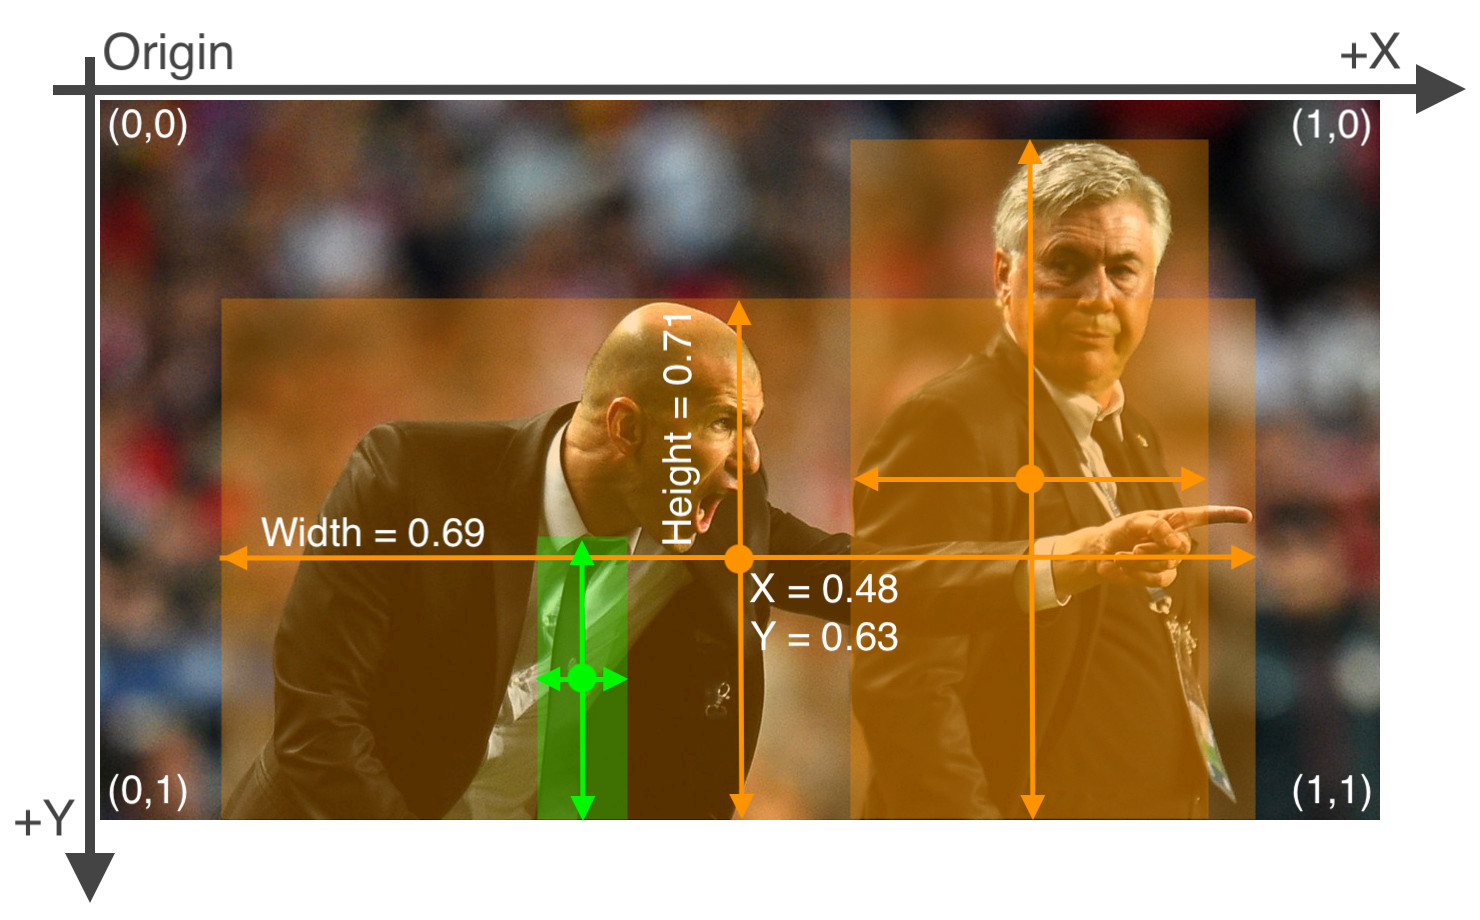

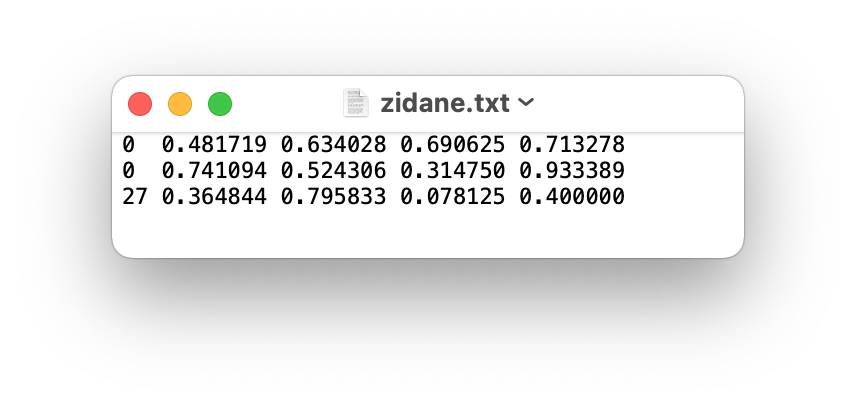

1.3. Организовать хранение изображений и разметок к ним в следующем порядке:

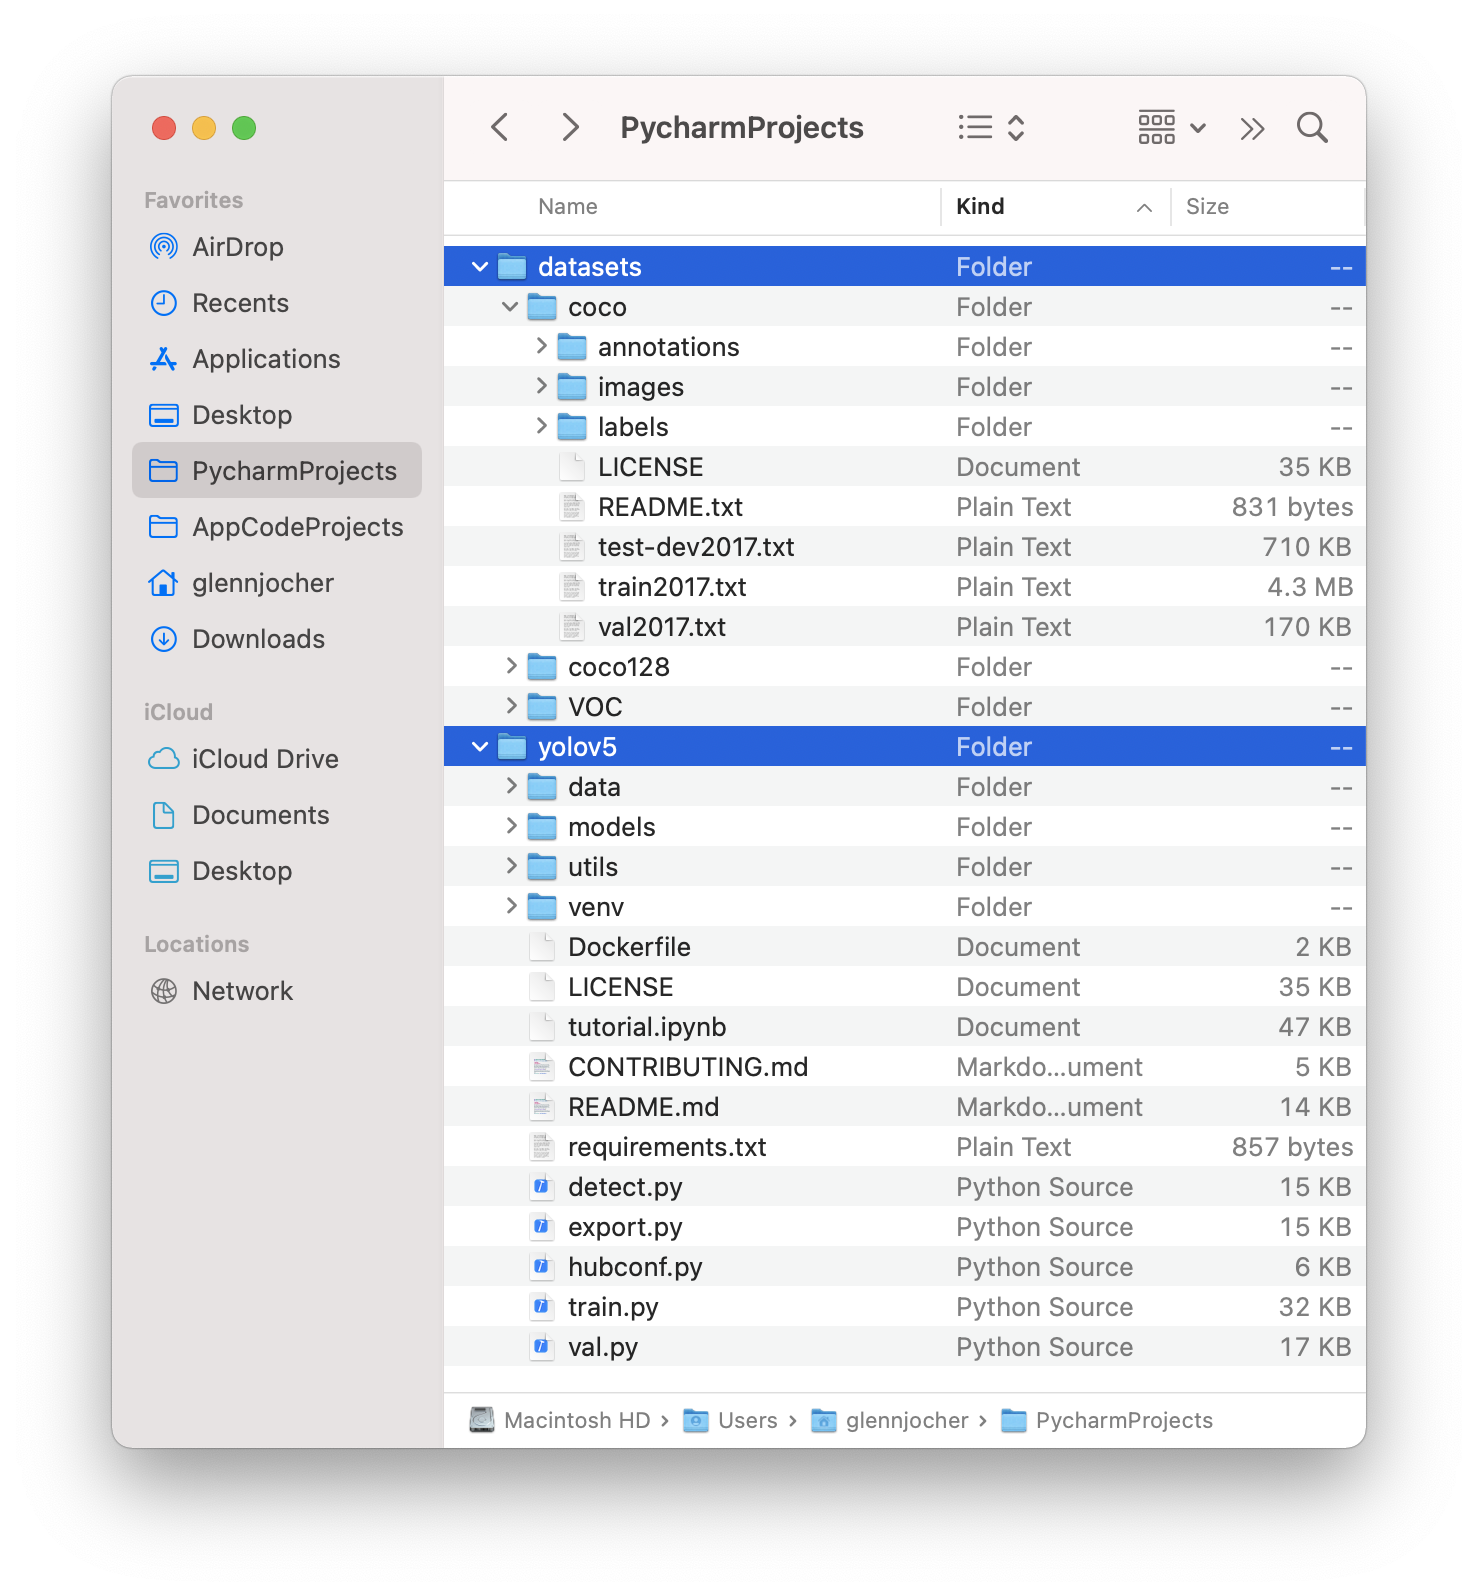

YOLO автоматически создает путь к аннотациям изображения, заменяя images на labels в пути к изображению. <br>
../datasets/coco128/images/im0.jpg -> ../datasets/coco128/labels/im0.txt  # label

### HOMEWORK
Скачать датасет с Kaggle (https://www.kaggle.com/competitions/tensorflow-great-barrier-reef/data). <br>
Подключить гугл диск к колабу.<br>
Закинуть на гугл диск часть изображений из скачанного датасета (train_images/video_0).<br>
Сгенерировать лейблы из файла train.csv такого формата, который нужен для обучения YOLO (только для video 0). Для каждого изображения из video_0 должен быть txt файл с таким же именем, который будет содержать разметку для всех объектов этого изображения<br>
Сложить данные так, как нужно для обучения модели (таким образом, чтобы при замене images в пути к картинкам на lables получались пути к лейблам, см. выше)<br>
Внести изменения в пути и количество классов и их название в файле coco128.yaml (или создать новый файл на подобие coco128.yaml, в котором будут пути к данным и тд) <br>
Запустить обучение YOLOv5 на наших данных. 



# Лабораторная работа №7(3)
### Группа: М8О-407Б-18
### Студент: Бердикин Т.А.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!DATASET_DIR='/content/drive/MyDrive/reef/images/reef'
!ls $DATASET_DIR
#!mv  "$DATASET_DIR/video_0" "$DATASET_DIR/images" 
#!ls $DATASET_DIR

CONTRIBUTING.md  export.py   models	       setup.cfg       utils
data		 hubconf.py  README.md	       train.py        val.py
detect.py	 LICENSE     requirements.txt  tutorial.ipynb


In [4]:
import pandas as pd
import os
import PIL

In [6]:
DATASET_DIR = '/content/drive/MyDrive/reef/images/reef'
os.mkdir(DATASET_DIR+'/labels')

In [7]:
df = pd.read_csv(DATASET_DIR + '/train.csv')
df

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
0,0,40258,0,0,0-0,[]
1,0,40258,1,1,0-1,[]
2,0,40258,2,2,0-2,[]
3,0,40258,3,3,0-3,[]
4,0,40258,4,4,0-4,[]
...,...,...,...,...,...,...
23496,2,29859,10755,2983,2-10755,[]
23497,2,29859,10756,2984,2-10756,[]
23498,2,29859,10757,2985,2-10757,[]
23499,2,29859,10758,2986,2-10758,[]


In [8]:
DATASET_DIR_IMAGES = DATASET_DIR + '/images'
DATASET_DIR_LABELS = DATASET_DIR + '/labels'


In [9]:
from tqdm import tqdm
for idx, row in tqdm(df.iterrows(), desc = 'creating labels...'):
  idx = row['video_frame']
  img_name   = DATASET_DIR_IMAGES + f'/{idx}.jpg'
  dscrb_name = DATASET_DIR_LABELS + f'/{idx}.txt'

  width, height = (0,0)
  if not os.path.exists(img_name) :
  #  print(f'Image {img_name} does not exists')
    continue


  with PIL.Image.open(img_name) as img:
    width, height = img.size
  
  
  clss = eval(row['annotations'])
 
  if len(clss) is 0 :
    os.remove(img_name)
    continue

  f = open(dscrb_name, 'w')
  for cls in clss:
    discription = '0 {0} {1}  {2} {3}\n'.format(cls['x']/width, cls['y']/height, cls['width']/width, cls['height']/height)
    f.write(discription)
  f.close()

creating labels...: 23501it [04:53, 79.94it/s]  


In [11]:
with open('./data/reef.yaml', 'w') as f:
  f.write(f'path: {DATASET_DIR}\n')
  f.write('train: .\n')
  f.write('val: .\n')
  f.write('nc: 1\n')
  f.write('names: [\'starfish\']\n')

  
  

In [12]:
!python train.py --img 1000 --batch 4 --epochs 25 --data reef.yaml --weights yolov5s.pt --hyp data/hyps/hyp.scratch-low.yaml

train: weights=yolov5s.pt, cfg=, data=reef.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=4, imgsz=1000, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0

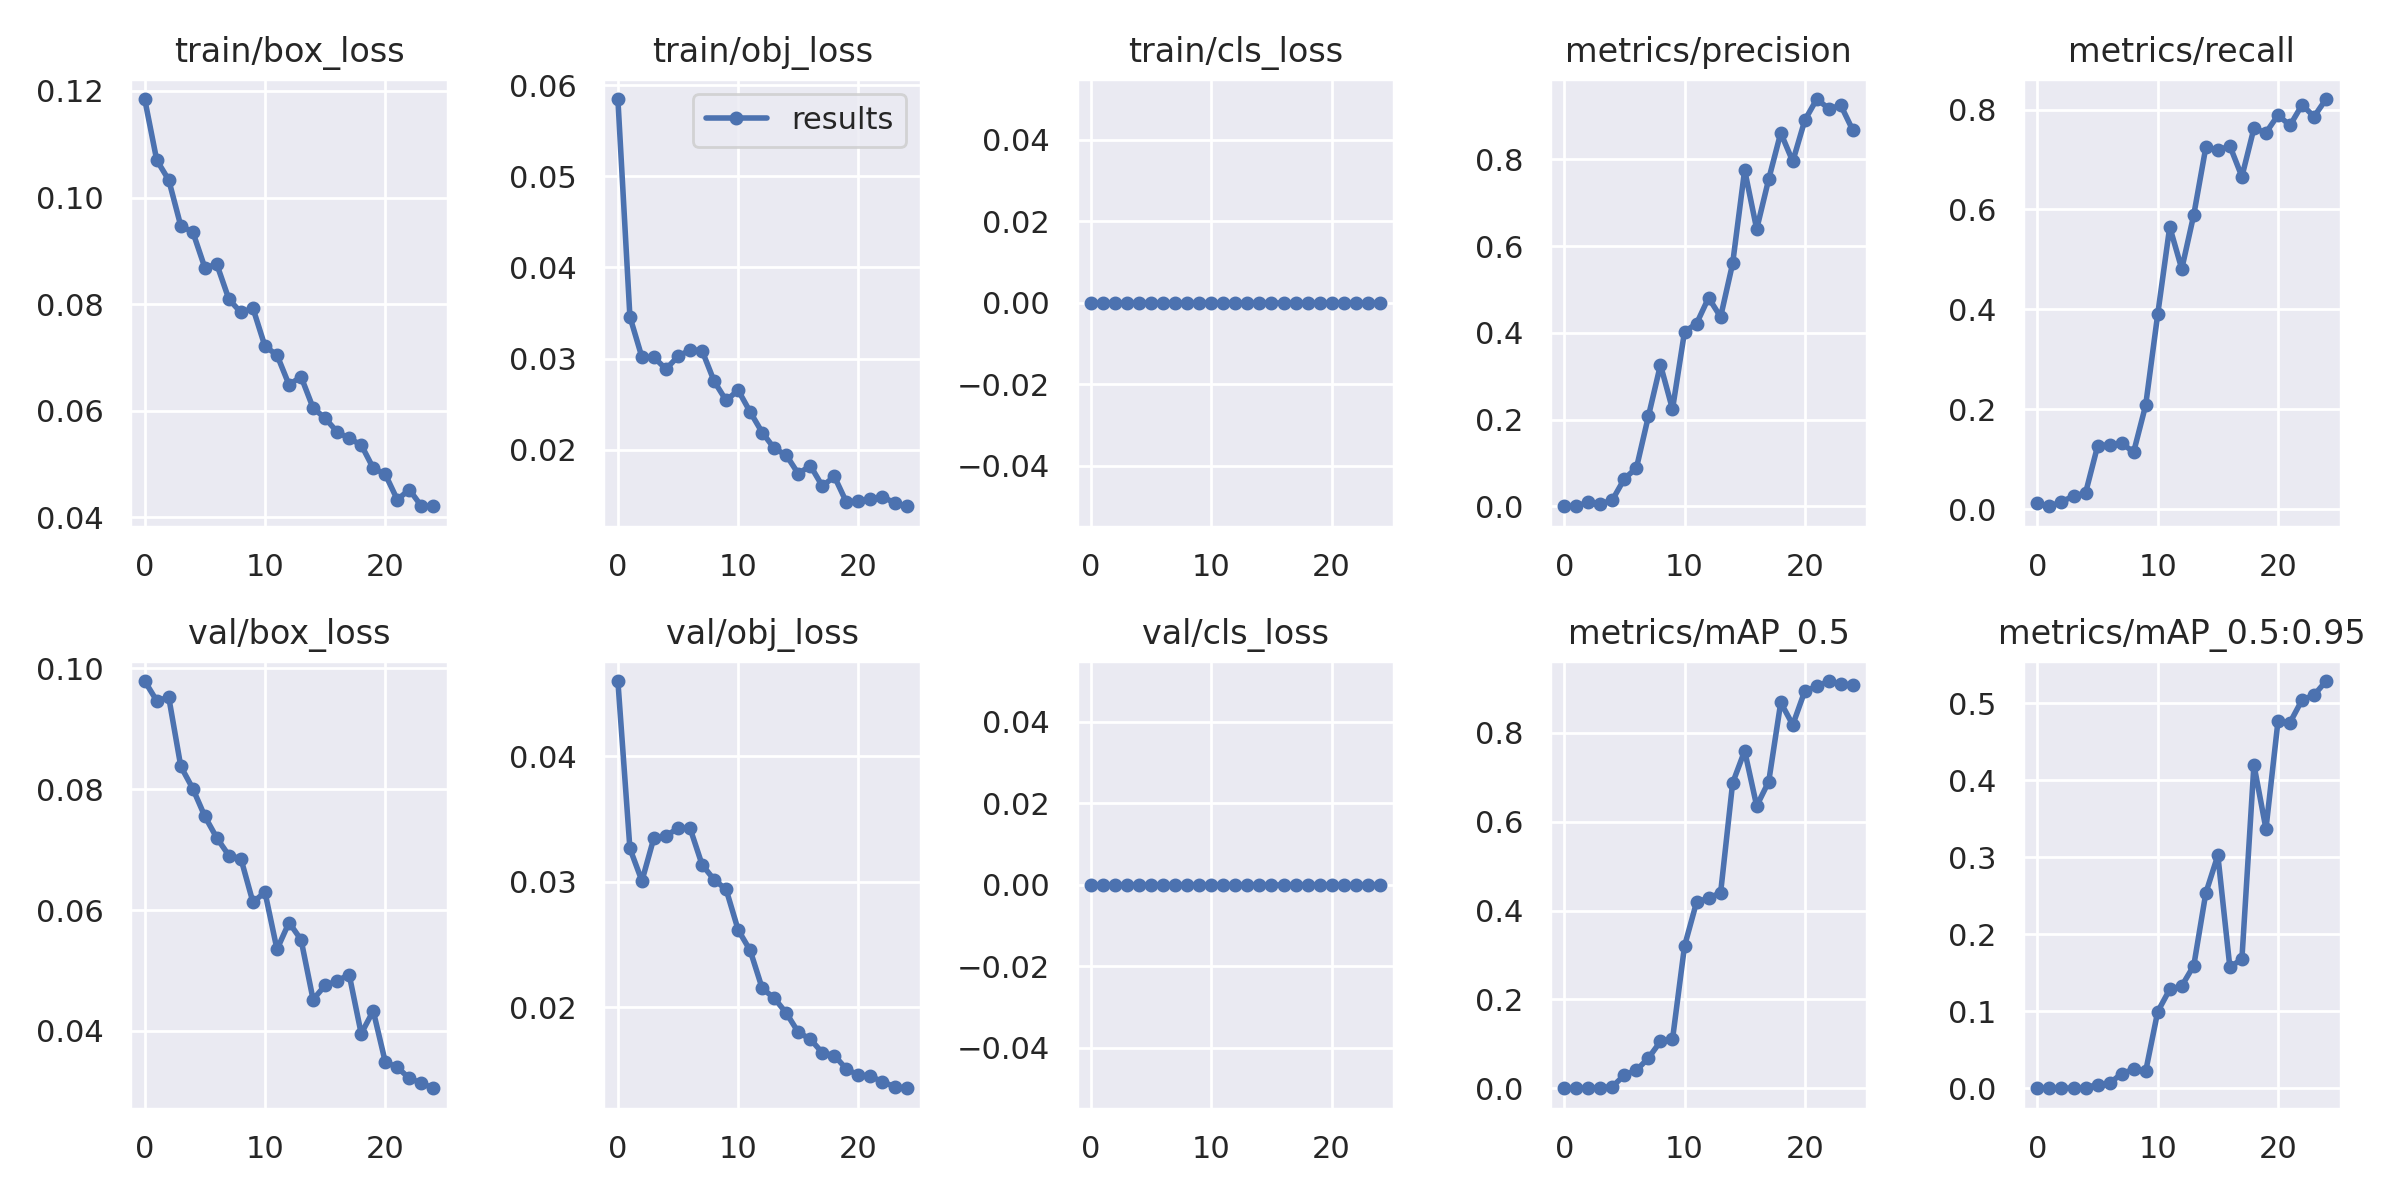

In [16]:
import IPython
IPython.display.Image('/content/yolov5/runs/train/exp/results.png', width=1000)

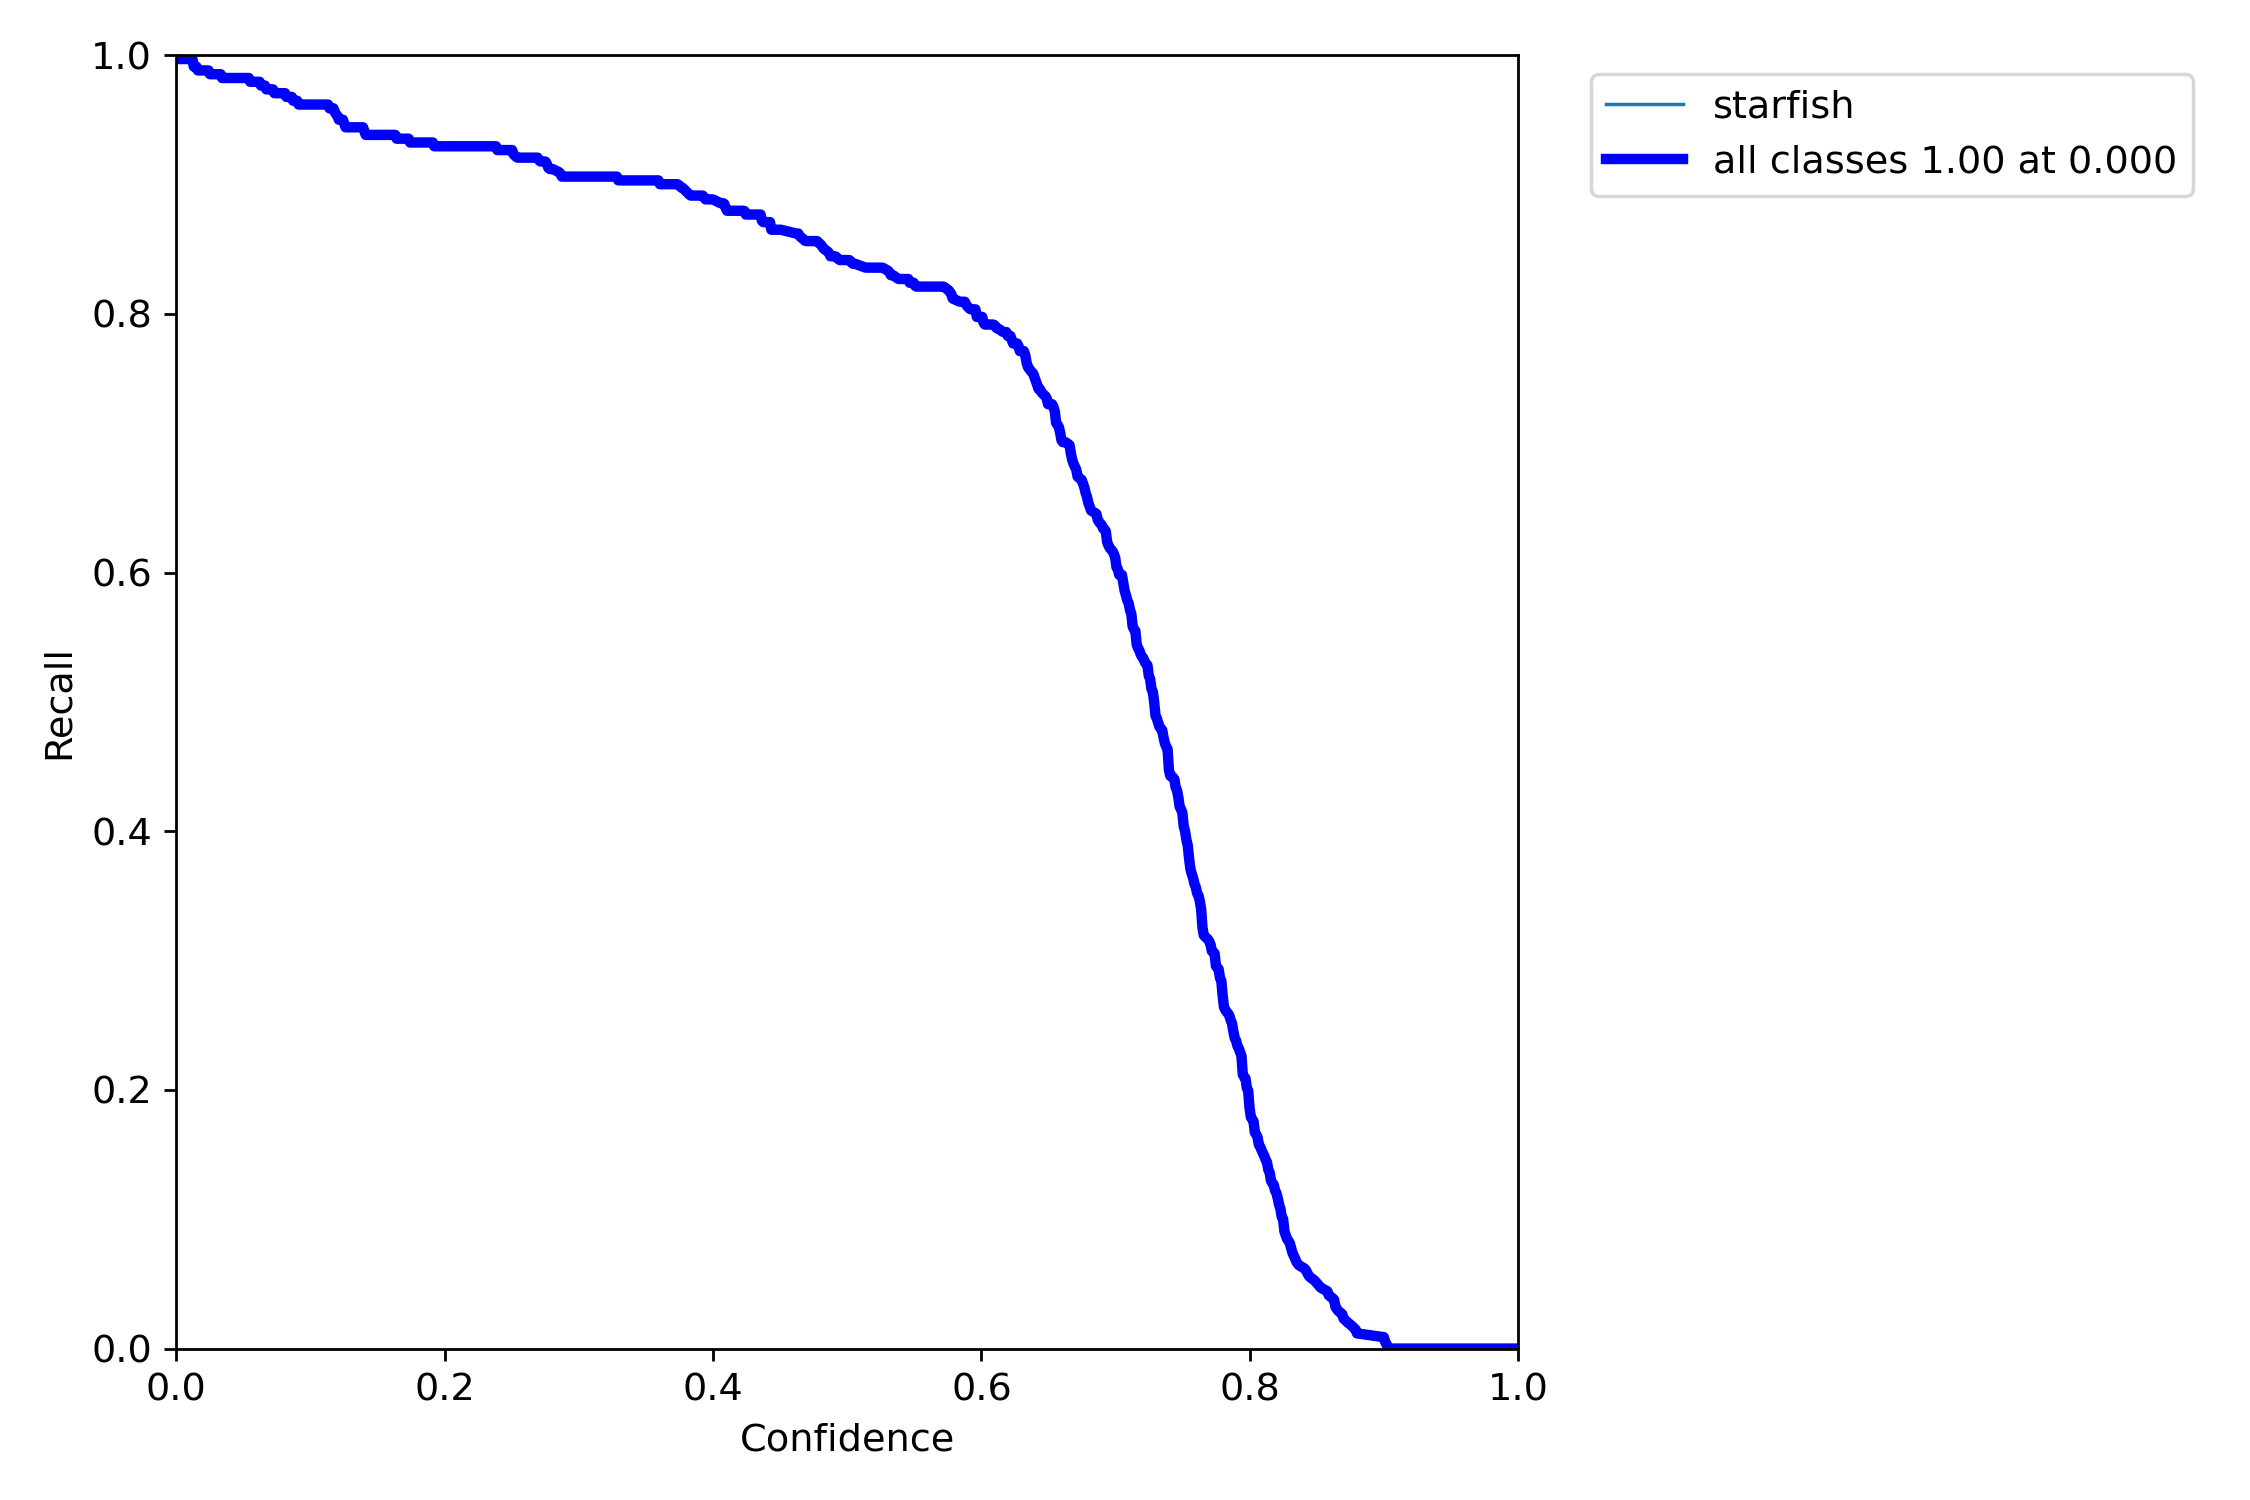

In [17]:
IPython.display.Image('/content/yolov5/runs/train/exp/R_curve.png', width=700)


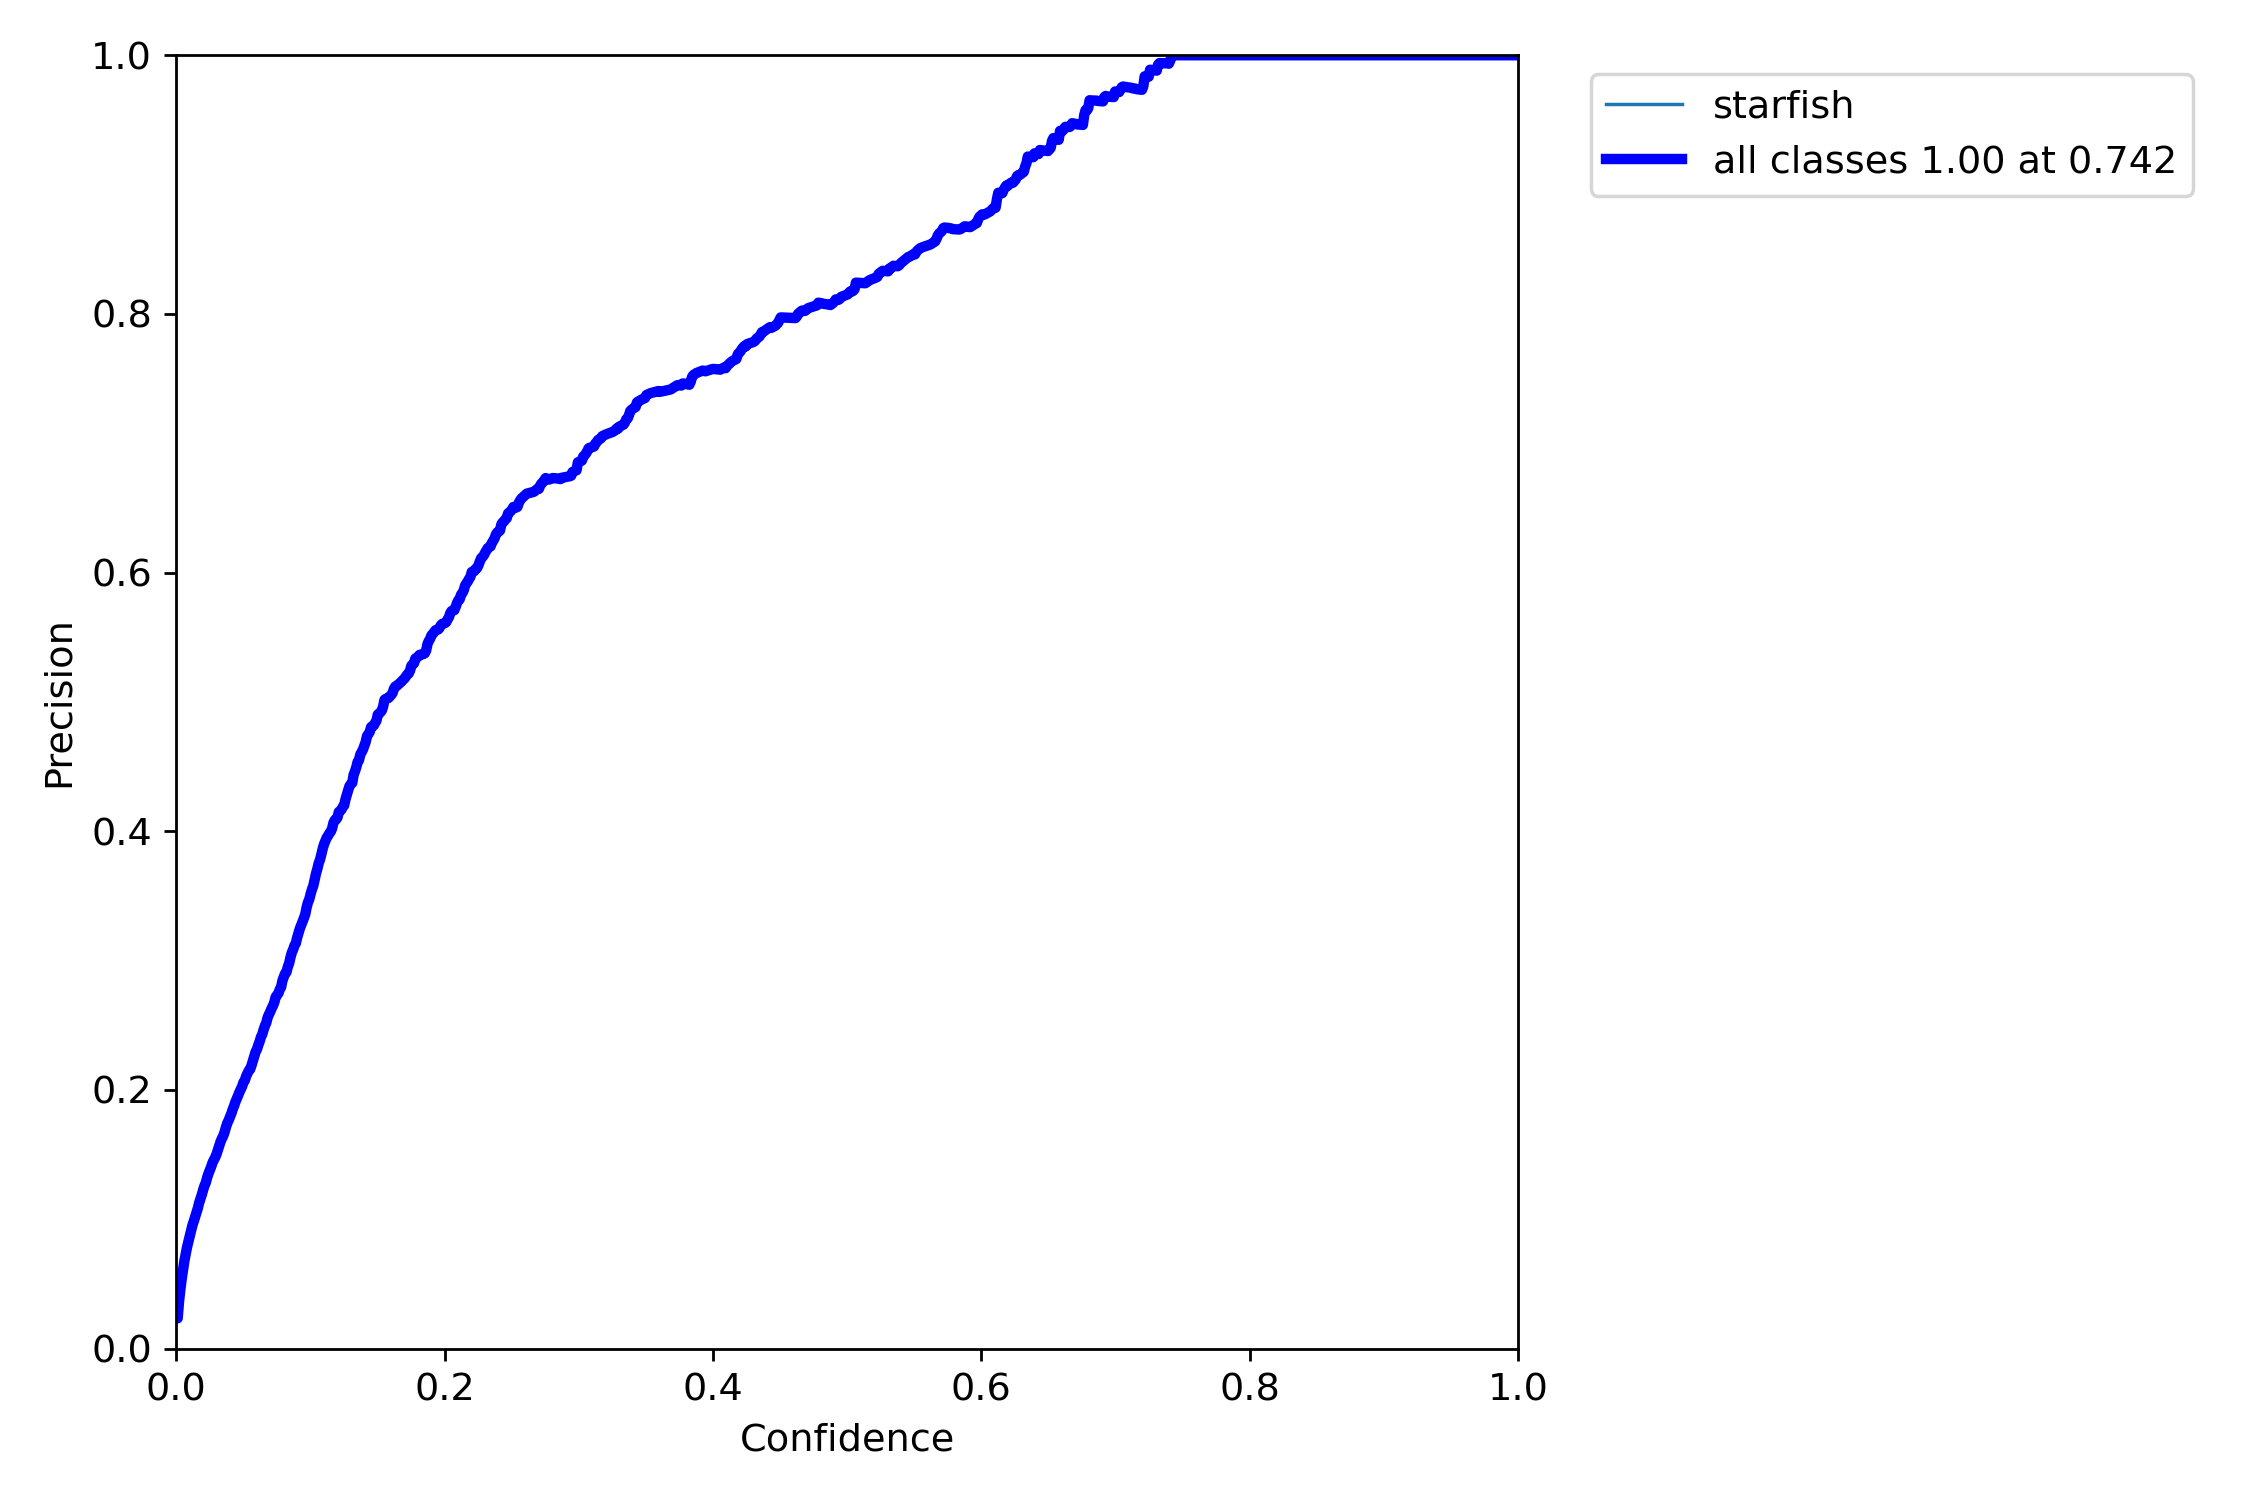

In [18]:
IPython.display.Image('/content/yolov5/runs/train/exp/P_curve.png', width=700)


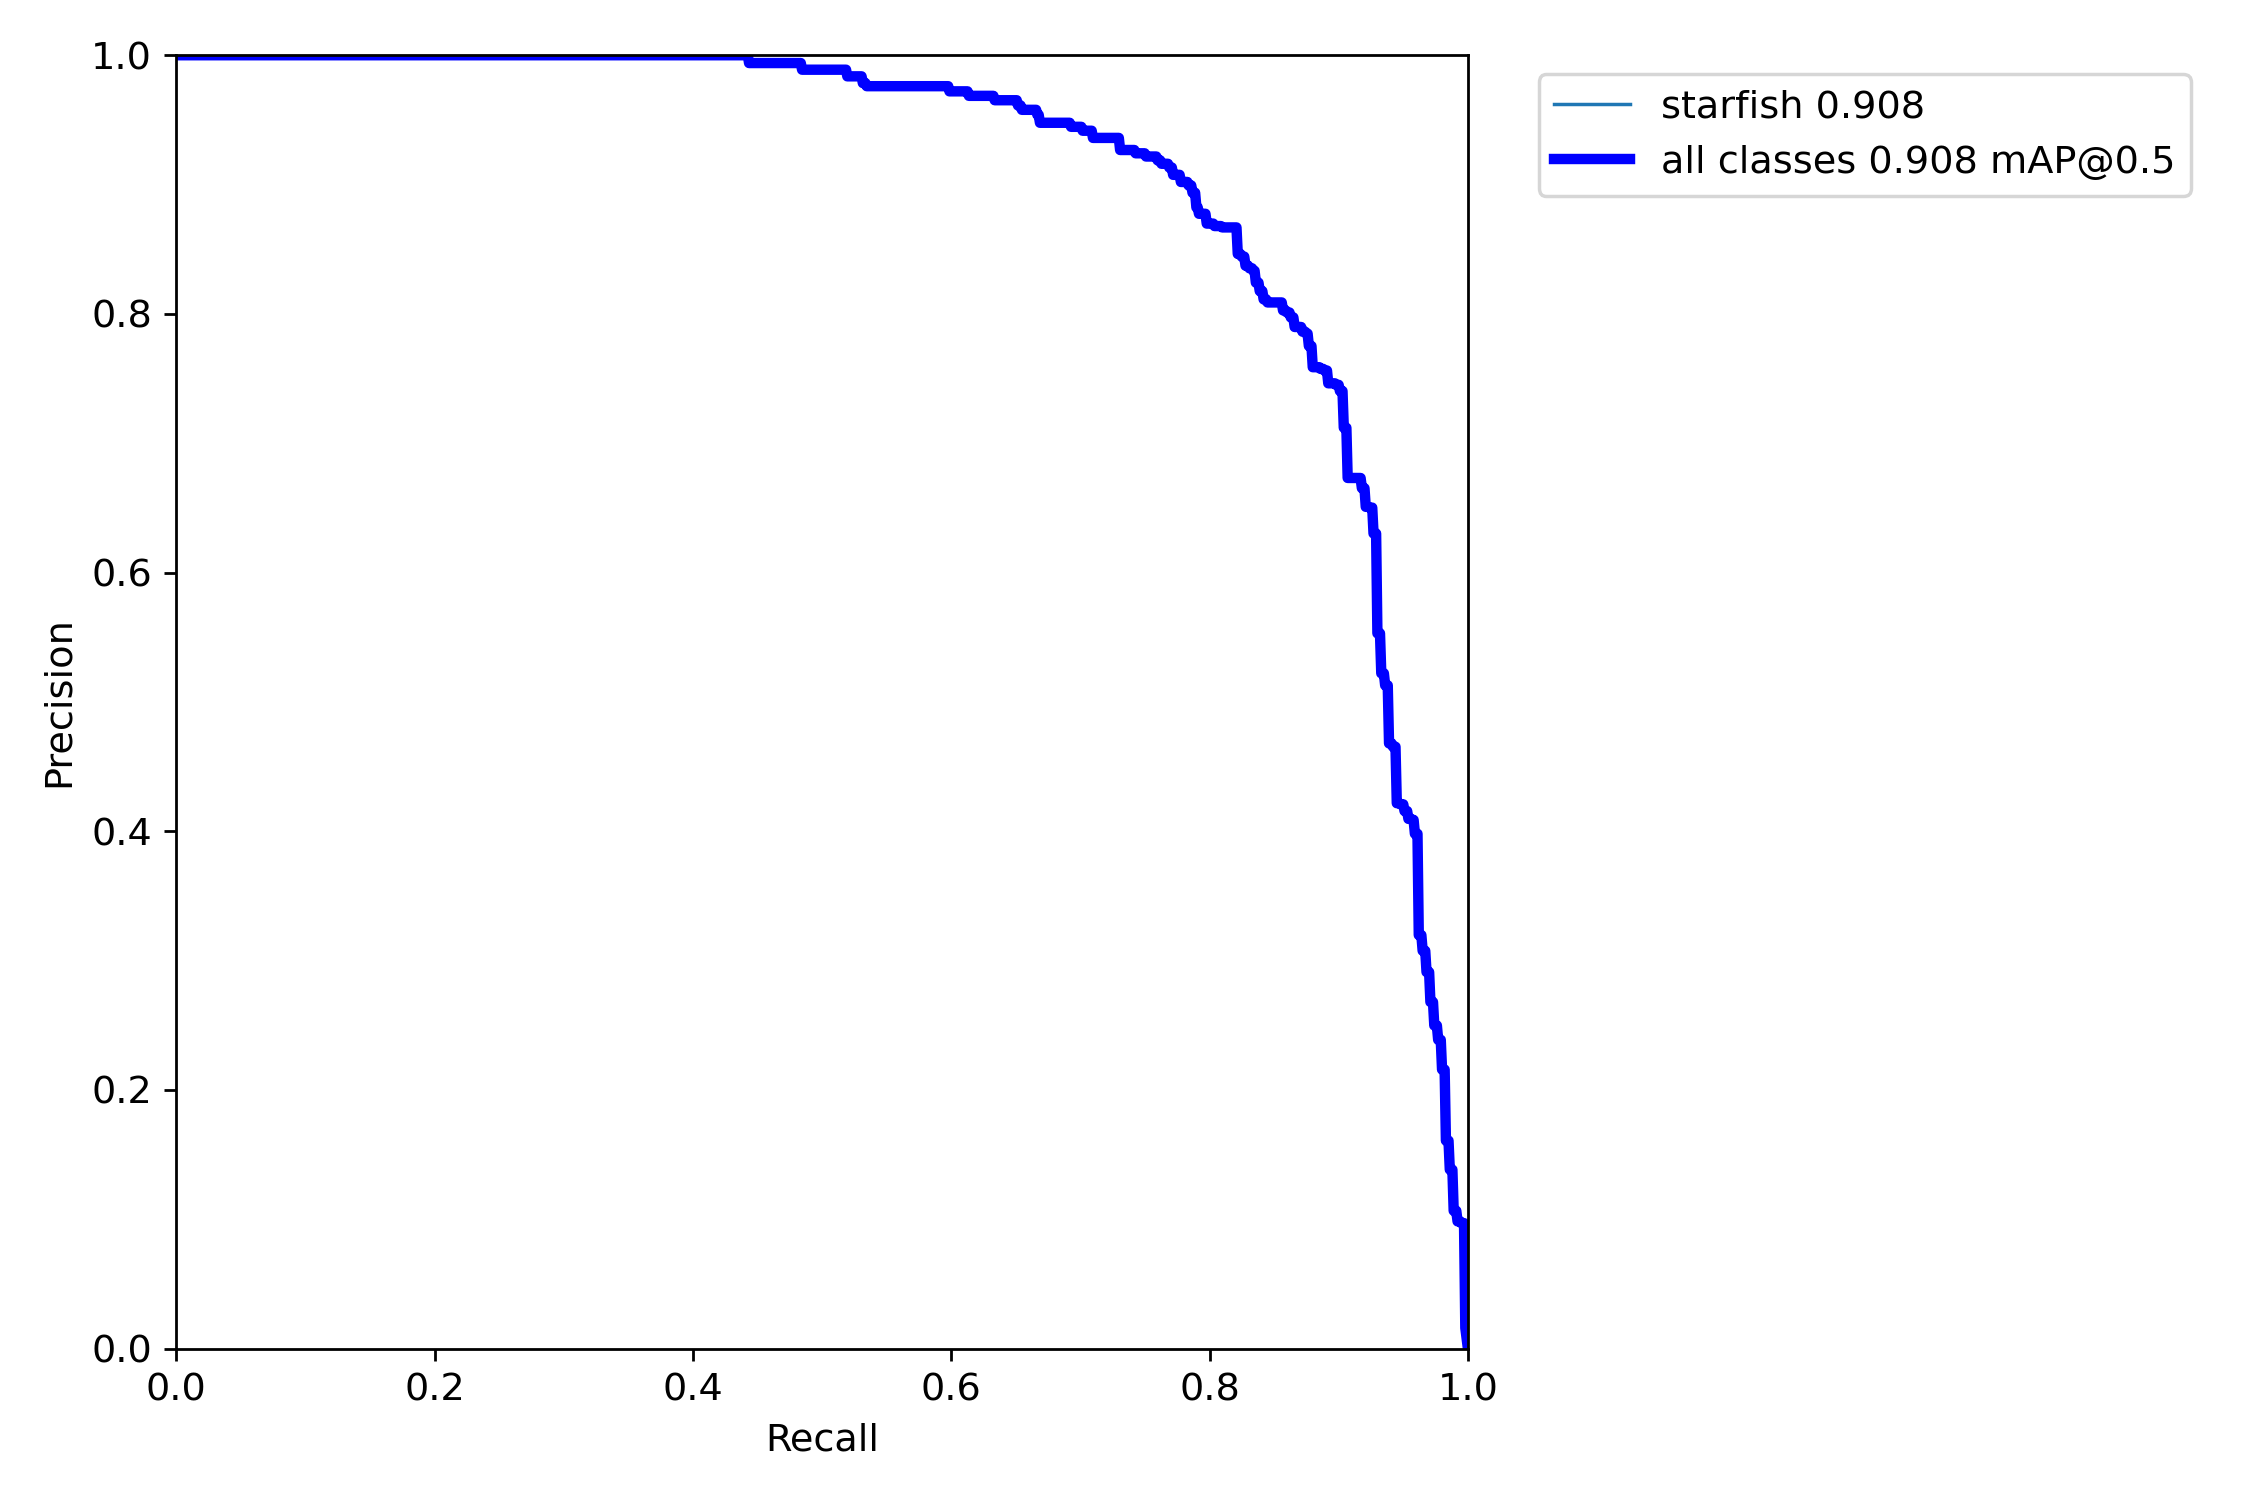

In [19]:
IPython.display.Image('/content/yolov5/runs/train/exp/PR_curve.png', width=700)


In [21]:
!cp runs/train/exp/weights/best.pt /content/drive/MyDrive/Colab\ Notebooks/